**Import the Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import random

seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [5]:
df = pd.read_csv('/content/FINAL_FROM_DF.csv')


**Data Preprocessing**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846404 entries, 0 to 846403
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SYMBOL       846404 non-null  object 
 1   SERIES       843947 non-null  object 
 2   OPEN         846404 non-null  float64
 3   HIGH         846404 non-null  float64
 4   LOW          846404 non-null  float64
 5   CLOSE        846404 non-null  float64
 6   LAST         846404 non-null  float64
 7   PREVCLOSE    846404 non-null  float64
 8   TOTTRDQTY    846404 non-null  int64  
 9   TOTTRDVAL    846404 non-null  float64
 10  TIMESTAMP    846404 non-null  object 
 11  TOTALTRADES  846404 non-null  int64  
 12  ISIN         846404 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 83.9+ MB


In [7]:
df.describe()

,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES
count,846404.000000,846404.000000,846404.000000,846404.000000,846404.000000,846404.000000,8.464040e+05,8.464040e+05,8.464040e+05
mean,561.258797,568.679340,553.861861,560.815168,560.184430,560.225320,6.983800e+05,1.334592e+08,5.013823e+03
std,2005.760598,2027.159199,1983.412783,2004.576315,2003.900793,2000.362761,4.055630e+06,6.296968e+08,1.490112e+04
min,0.050000,0.050000,0.050000,0.050000,0.000000,0.050000,1.000000e+00,5.000000e-02,1.000000e+00
25%,39.900000,40.850000,38.850000,39.750000,39.600000,39.700000,6.628000e+03,6.071941e+05,8.400000e+01
50%,139.200000,142.050000,136.150000,138.900000,138.450000,138.750000,4.429200e+04,5.321067e+06,6.000000e+02
75%,490.000000,499.550000,481.100000,489.550000,488.500000,489.150000,2.757322e+05,3.711093e+07,3.028000e+03
max,119990.000000,119990.000000,119990.000000,119990.000000,119990.000000,119990.000000,7.818365e+08,1.426400e+11,1.192900e+06


**Missing Values**

In [8]:
df.isnull().sum()

,0
SYMBOL,0
SERIES,2457
OPEN,0
HIGH,0
LOW,0
CLOSE,0
LAST,0
PREVCLOSE,0
TOTTRDQTY,0
TOTTRDVAL,0


**Convert To DateTime**

In [9]:
df = df[['SERIES','OPEN', 'HIGH', 'LOW', 'CLOSE', 'LAST','PREVCLOSE', 'TOTTRDVAL', 'TIMESTAMP','SYMBOL']]
df = df.rename(columns={'TOTTRDVAL': 'Volume', 'SYMBOL': 'company_name'})

df['Date'] = pd.to_datetime(df['TIMESTAMP'])

df.set_index('Date', inplace=True)
df.sort_index(inplace=True)


df.drop(columns=['TIMESTAMP'], inplace=True)



In [10]:
df = df[ df['SERIES']=='EQ']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 739199 entries, 2016-01-01 to 2017-12-29
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   SERIES        739199 non-null  object 
 1   OPEN          739199 non-null  float64
 2   HIGH          739199 non-null  float64
 3   LOW           739199 non-null  float64
 4   CLOSE         739199 non-null  float64
 5   LAST          739199 non-null  float64
 6   PREVCLOSE     739199 non-null  float64
 7   Volume        739199 non-null  float64
 8   company_name  739199 non-null  object 
dtypes: float64(7), object(2)
memory usage: 56.4+ MB


**Select Top 4 Companies Based On The TOTALTRADES Column**


In [12]:
top_4_companies = df.nlargest(4, 'Volume')
print(top_4_companies)

           SERIES     OPEN     HIGH      LOW    CLOSE     LAST  PREVCLOSE  \
Date                                                                        
2017-02-17     EQ  1445.00  1454.00  1360.45  1377.05  1375.00    1327.90   
2017-10-25     EQ   279.85   328.05   279.85   324.90   322.95     254.45   
2017-08-18     EQ  1017.90  1017.90   884.20   923.25   923.15    1020.85   
2016-08-31     EQ   591.50   603.85   580.70   596.85   595.85     591.15   

                  Volume company_name  
Date                                   
2017-02-17  1.426400e+11     HDFCBANK  
2017-10-25  8.162141e+10         SBIN  
2017-08-18  7.662502e+10         INFY  
2016-08-31  7.179550e+10     AXISBANK  


In [13]:
INFY = df[df['company_name']=='INFY']
HDFCBANK = df[df['company_name']=='HDFCBANK']
AXISBANK   = df[df['company_name']=='AXISBANK']
SBIN   = df[df['company_name']=='SBIN']


In [14]:
company_list =[INFY, HDFCBANK,AXISBANK,SBIN]
company_name  =['INFY','SBIN','AXISBANK','HDFCBANK']

In [15]:
INFY.head()

,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,Volume,company_name
Date,,,,,,,,,
2016-01-01,EQ,1100.00,1108.95,1093.20,1105.25,1103.00,1105.40,9.964333e+08,INFY
2016-01-04,EQ,1099.95,1102.45,1076.05,1078.90,1078.50,1105.25,2.162231e+09,INFY
2016-01-05,EQ,1085.50,1085.50,1062.25,1074.05,1073.00,1078.90,2.655975e+09,INFY
2016-01-06,EQ,1074.65,1074.65,1058.90,1069.35,1068.50,1074.05,2.982910e+09,INFY
2016-01-07,EQ,1060.05,1067.90,1047.90,1050.80,1052.55,1069.35,2.799256e+09,INFY


In [16]:
INFY.describe()

,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,Volume
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02
mean,1032.456465,1042.283737,1021.293333,1031.485758,1031.372929,1031.613737,4.214243e+09
std,97.914264,99.272783,96.946076,98.051291,98.081386,98.106436,4.748378e+09
min,880.000000,887.600000,860.000000,873.400000,870.150000,873.400000,3.197183e+08
25%,954.825000,964.175000,947.225000,955.200000,955.450000,955.200000,2.538328e+09
50%,1006.100000,1017.900000,996.250000,1005.300000,1005.400000,1005.300000,3.271249e+09
75%,1087.800000,1101.325000,1075.100000,1085.075000,1085.275000,1085.300000,4.341024e+09
max,1267.000000,1279.300000,1261.100000,1267.600000,1267.250000,1267.600000,7.662502e+10


In [17]:
AXISBANK.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 495 entries, 2016-01-01 to 2017-12-29
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SERIES        495 non-null    object 
 1   OPEN          495 non-null    float64
 2   HIGH          495 non-null    float64
 3   LOW           495 non-null    float64
 4   CLOSE         495 non-null    float64
 5   LAST          495 non-null    float64
 6   PREVCLOSE     495 non-null    float64
 7   Volume        495 non-null    float64
 8   company_name  495 non-null    object 
dtypes: float64(7), object(2)
memory usage: 38.7+ KB


**Data Vizualization and Anlysis**

In [18]:
df1 = df[df['company_name'].isin(['INFY', 'HDFCBANK', 'SBIN','AXISBANK'])]

Boxplot of Closing Prices by Company

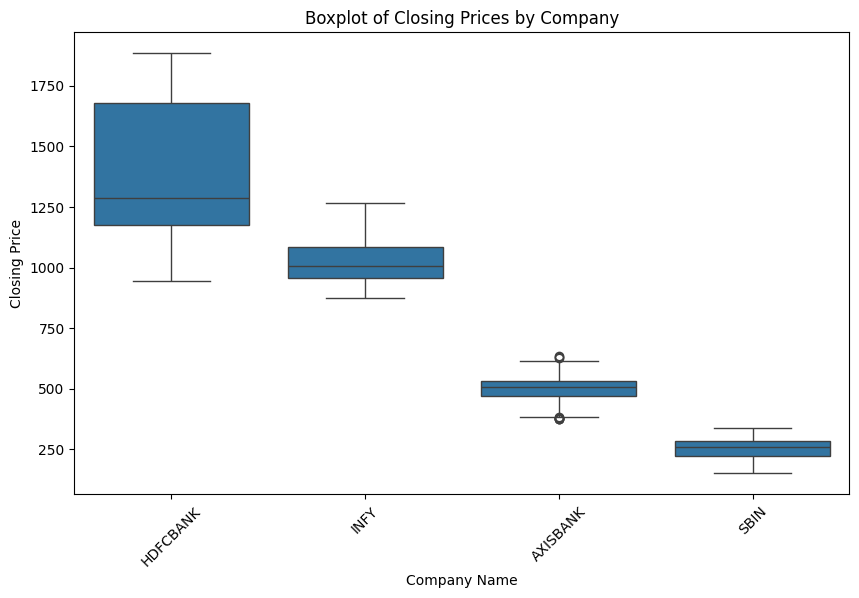

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_name', y='CLOSE', data=df1)
plt.xlabel('Company Name')
plt.ylabel('Closing Price')
plt.title('Boxplot of Closing Prices by Company')
plt.xticks(rotation=45)
plt.show()



Sctterplot for Open vs. Close Prices

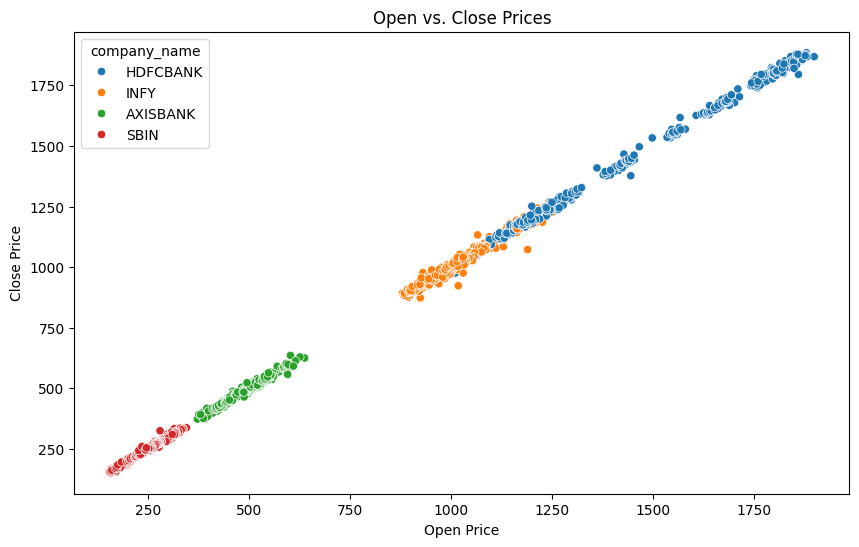

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OPEN', y='CLOSE', data=df1, hue='company_name')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Open vs. Close Prices')
plt.show()

Opning Price of Company

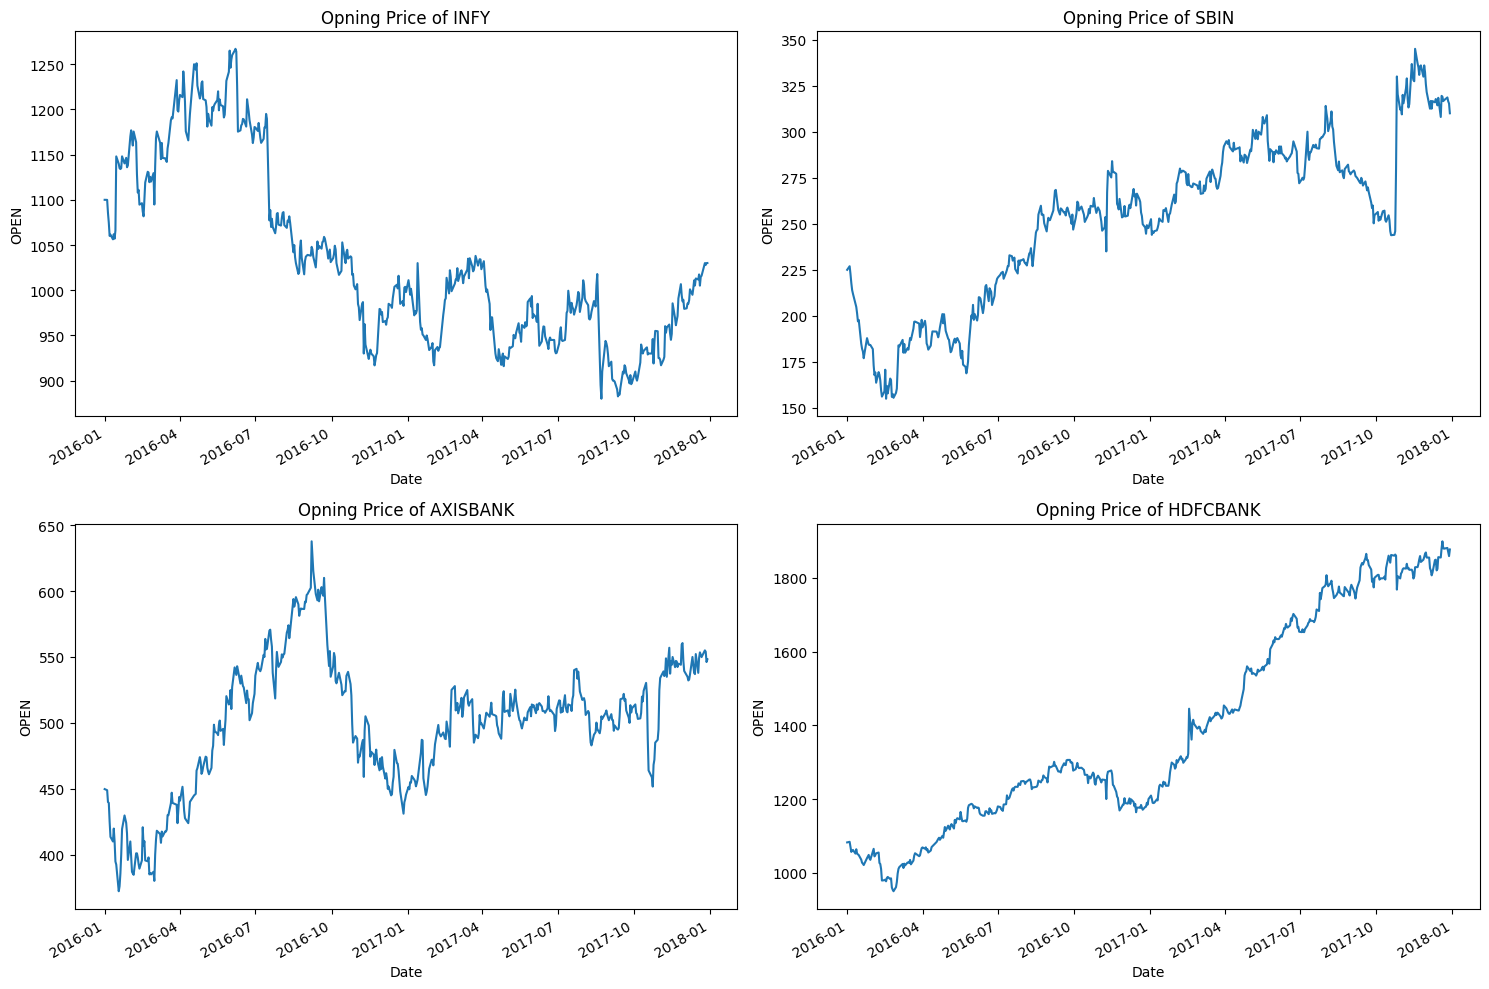

In [21]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company_name_iter in enumerate(company_name, 1):
    company_df = df[df['company_name'] == company_name_iter]

    plt.subplot(2, 2, i)
    company_df['OPEN'].plot()
    plt.ylabel('OPEN')
    plt.title(f"Opning Price of {company_name_iter}")

plt.tight_layout()

Closing Price of Company

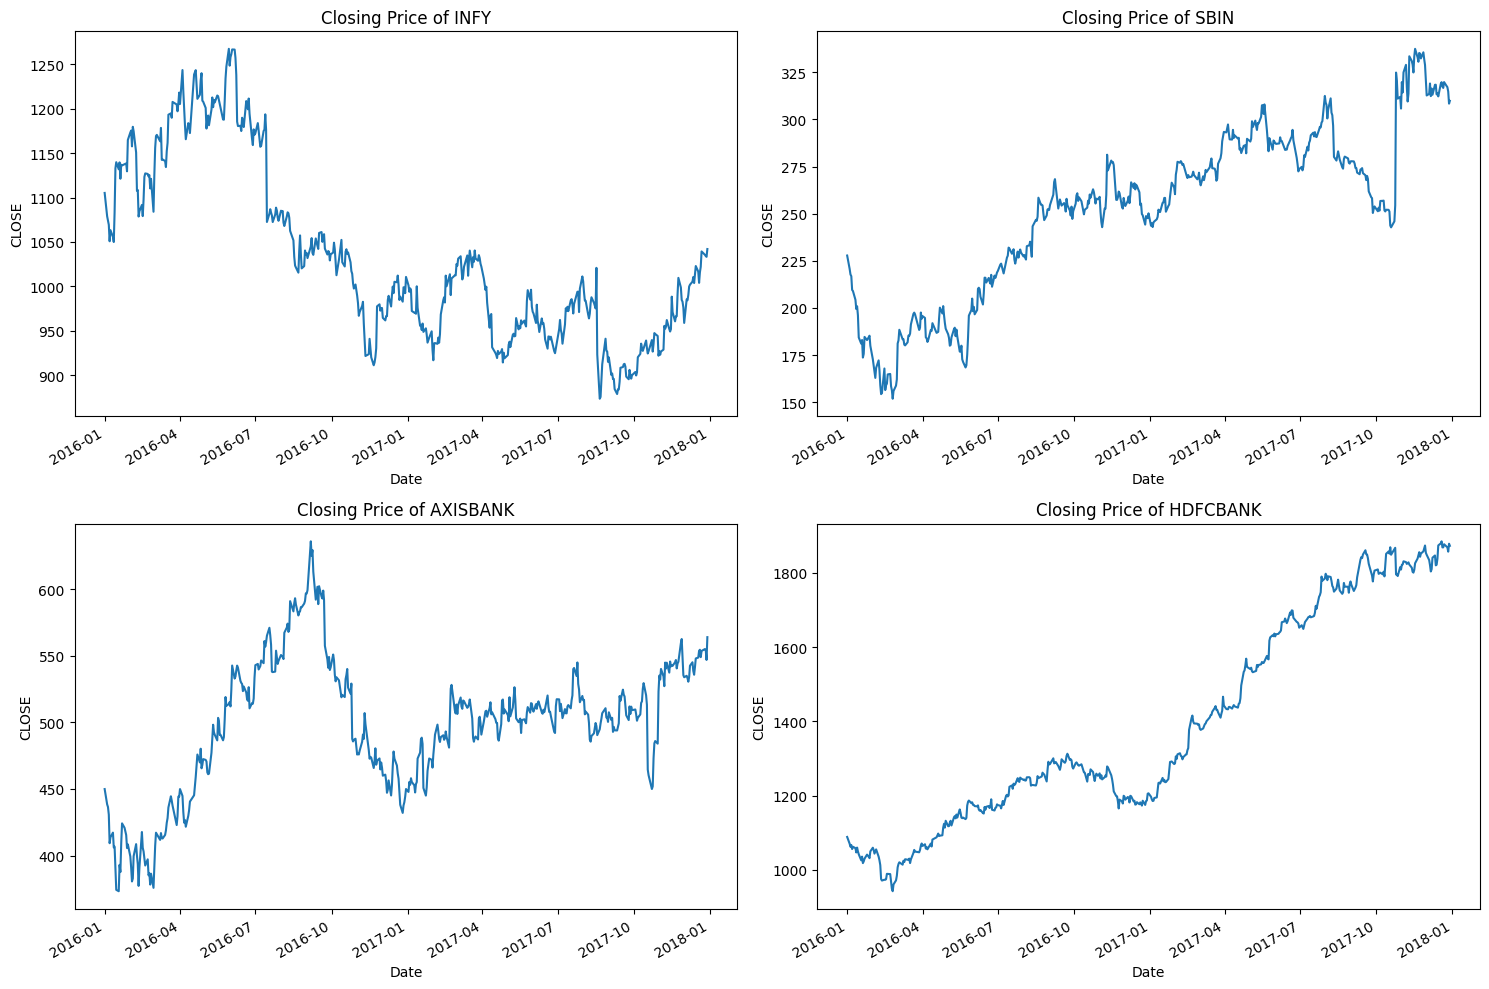

In [49]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company_name_iter in enumerate(company_name, 1):
    company_df = df[df['company_name'] == company_name_iter]

    plt.subplot(2, 2, i)
    company_df['CLOSE'].plot()
    plt.ylabel('CLOSE')
    plt.title(f"Closing Price of {company_name_iter}")

plt.tight_layout()

**Trade Volume of Company**

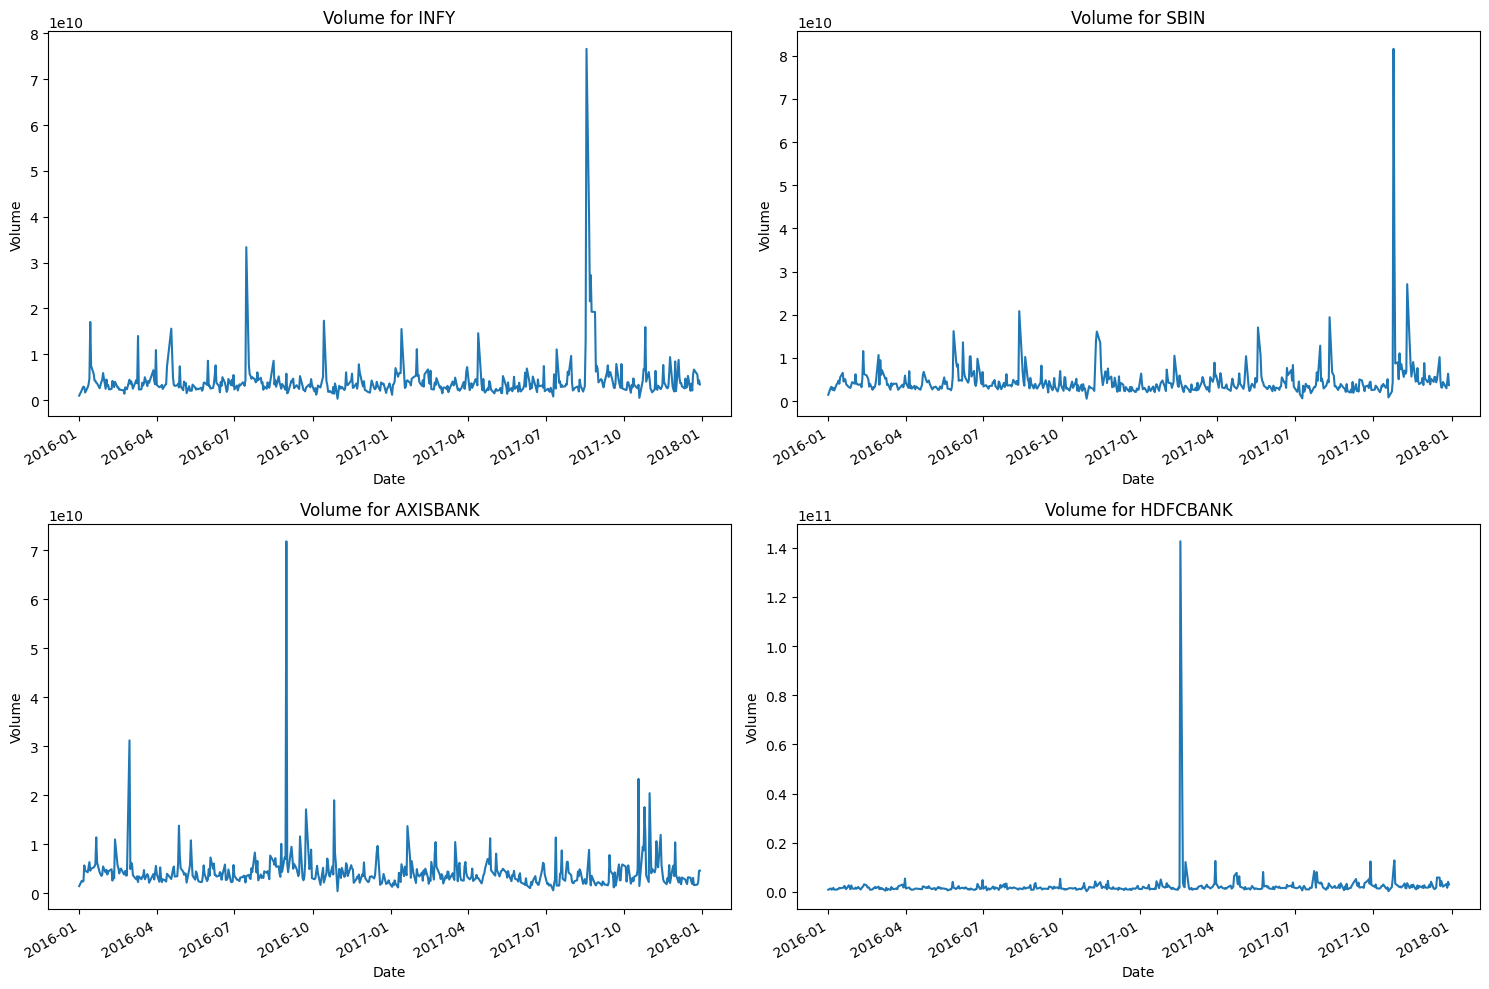

In [50]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company_name_iter in enumerate(company_name, 1):
    company_df = df[df['company_name'] == company_name_iter]

    plt.subplot(2, 2, i)
    company_df['Volume'].plot()
    plt.ylabel('Volume')
    plt.title(f"Volume for {company_name_iter}")

plt.tight_layout()


for company_name_iter in company_name:
    company = df[df['company_name'] == company_name_iter]
    company['Daily Return'] = company['CLOSE'].pct_change()

    # Assign to the correct variables based on company_name_iter
    if company_name_iter == 'INFY':
        INFY = company
    elif company_name_iter == 'HDFCBANK':  # Changed from HDFCLIFE to HDFCBANK
        HDFCBANK = company
    elif company_name_iter == 'AXISBANK  ':  # Changed from DMART to AXISBANK
        AXISBANK = company
    elif company_name_iter == 'SBIN  ':  # Added for SBIN
        SBIN = company

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

INFY['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('INFY')

HDFCBANK['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')  # Changed from HDFCLIFE to HDFCBANK
axes[0,1].set_title('HDFCBANK')  # Changed from HDFCLIFE to HDFCBANK

AXISBANK['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')  # Changed from DMART to AXISBANK and axes to [1, 0]
axes[1,0].set_title('AXISBANK')  # Changed from DMART to AXISBANK

SBIN['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')  # Added for SBIN, axes to [1, 1]
axes[1, 1].set_title('SBIN')  # Added for SBIN


fig.tight_layout()

**Moving Avarage for 2,4,10 Weeks**

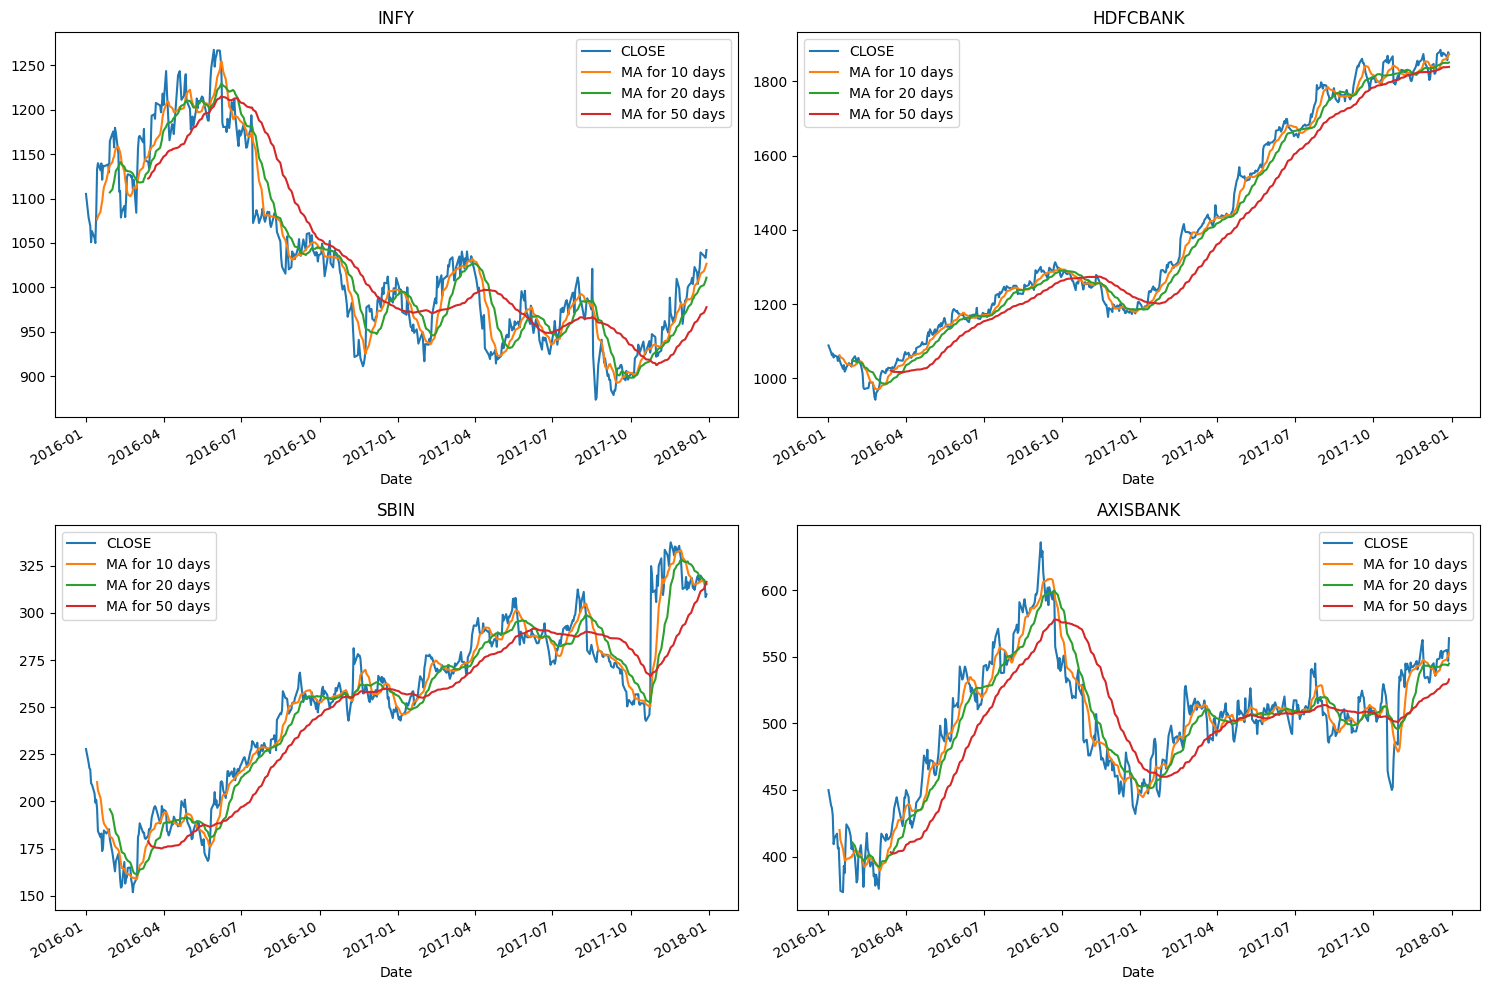

In [24]:
import matplotlib.pyplot as plt

ma_day = [10, 20, 50]



for company_name_iter in company_name:
    company = df[df['company_name'] == company_name_iter]
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        company[column_name] = company['CLOSE'].rolling(ma).mean()

    if company_name_iter == 'INFY':
        INFY = company
    elif company_name_iter == 'HDFCBANK':
        HDFCBANK = company
    elif company_name_iter == 'SBIN':
        SBIN = company
    elif company_name_iter == 'AXISBANK':
        AXISBANK = company

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

INFY[['CLOSE', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('INFY')

HDFCBANK[['CLOSE', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0, 1].set_title('HDFCBANK')

AXISBANK[['CLOSE', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1, 1].set_title('AXISBANK')

SBIN[['CLOSE', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1, 0].set_title('SBIN')

fig.tight_layout()
plt.show()


**Daily Return Histogram**

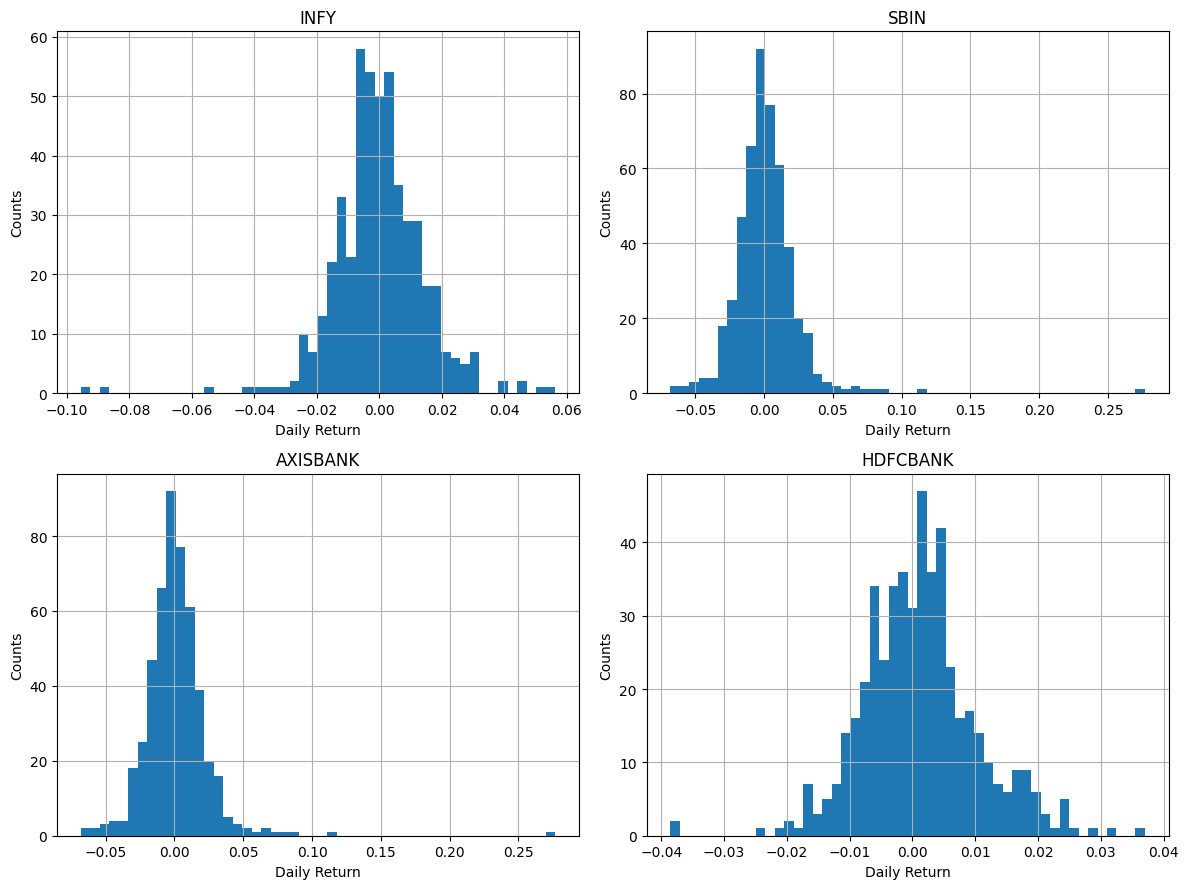

In [25]:
plt.figure(figsize=(12, 9))

for i, company_name_iter in enumerate(company_name, 1):
    if company_name_iter == 'INFY':
        company = INFY
    elif company_name_iter == 'HDFCBANK':
        company = HDFCBANK
    elif company_name_iter == 'SBIN':
        company = SBIN

    if 'Daily Return' not in company.columns:
        company['Daily Return'] = company['CLOSE'].pct_change()

    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name_iter}')

plt.tight_layout()

**Closing_prices Correlation**

In [26]:
closing_prices = pd.DataFrame({
    'INFY': INFY['CLOSE'].reset_index(drop=True),
    'HDFCBANK': HDFCBANK['CLOSE'].reset_index(drop=True),
    'SBIN': SBIN['CLOSE'].reset_index(drop=True),
    'AXISBANK': AXISBANK['CLOSE'].reset_index(drop=True)
})

In [27]:
correlation = closing_prices.corr()
print(correlation)

              INFY  HDFCBANK      SBIN  AXISBANK
INFY      1.000000 -0.693251 -0.776808 -0.207803
HDFCBANK -0.693251  1.000000  0.822435  0.454527
SBIN     -0.776808  0.822435  1.000000  0.541168
AXISBANK -0.207803  0.454527  0.541168  1.000000


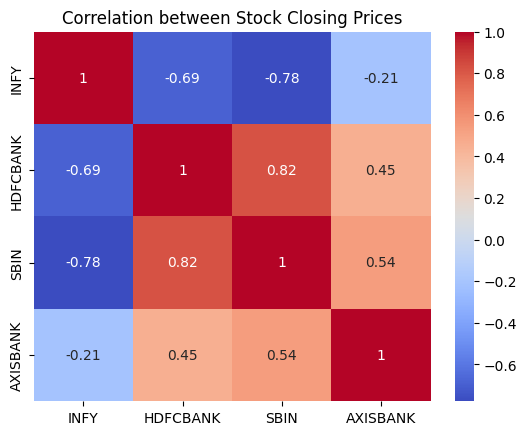

In [28]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Stock Closing Prices')
plt.show()

In [29]:
tech_rets = closing_prices.pct_change()
tech_rets.head()

,INFY,HDFCBANK,SBIN,AXISBANK
0,NaN,NaN,NaN,NaN
1,-0.023841,-0.016762,-0.031168,-0.025561
2,-0.004495,-0.007567,-0.013367,-0.004448
3,-0.004376,0.004424,-0.004133,-0.013174
4,-0.017347,-0.010215,-0.033664,-0.049803


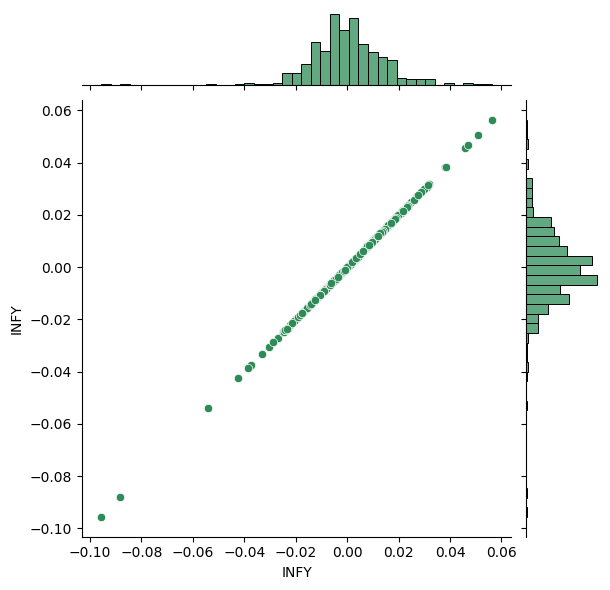

In [30]:
sns.jointplot(x='INFY', y='INFY', data=tech_rets, kind='scatter', color='seagreen')

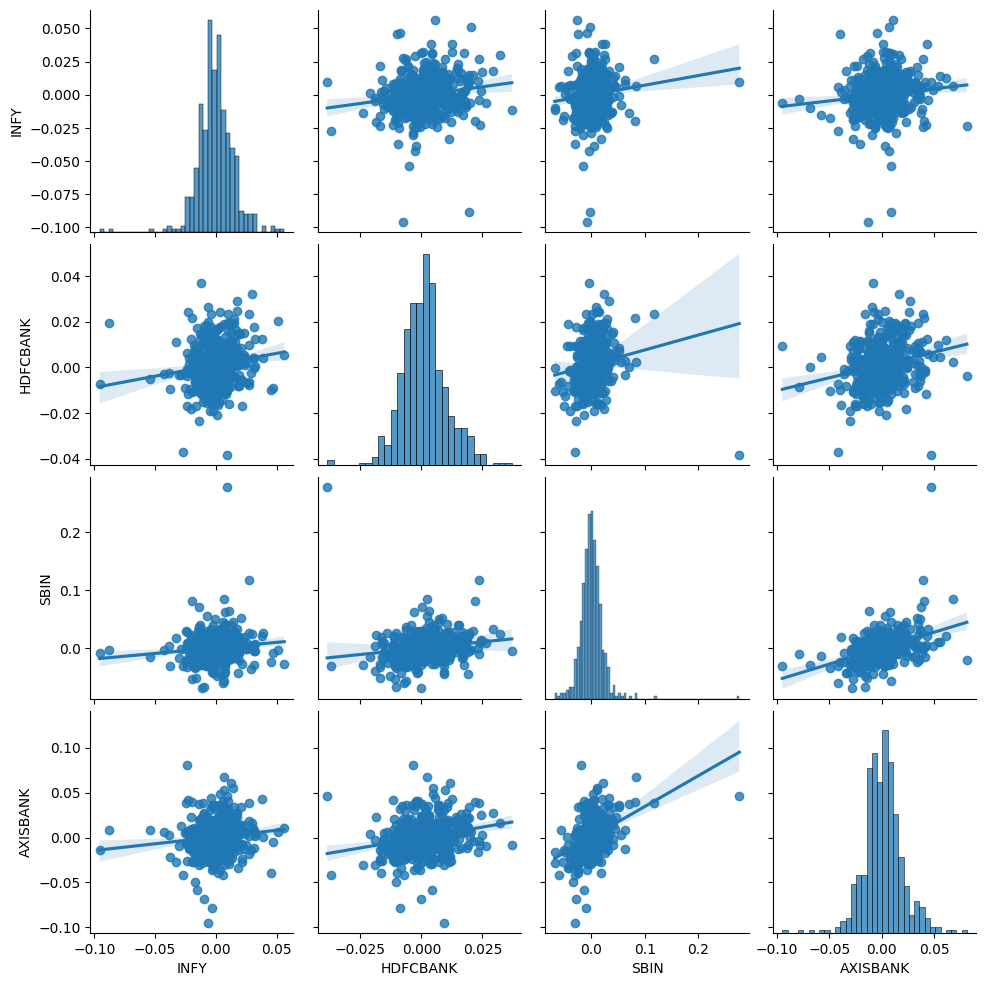

In [31]:
sns.pairplot(tech_rets, kind='reg')


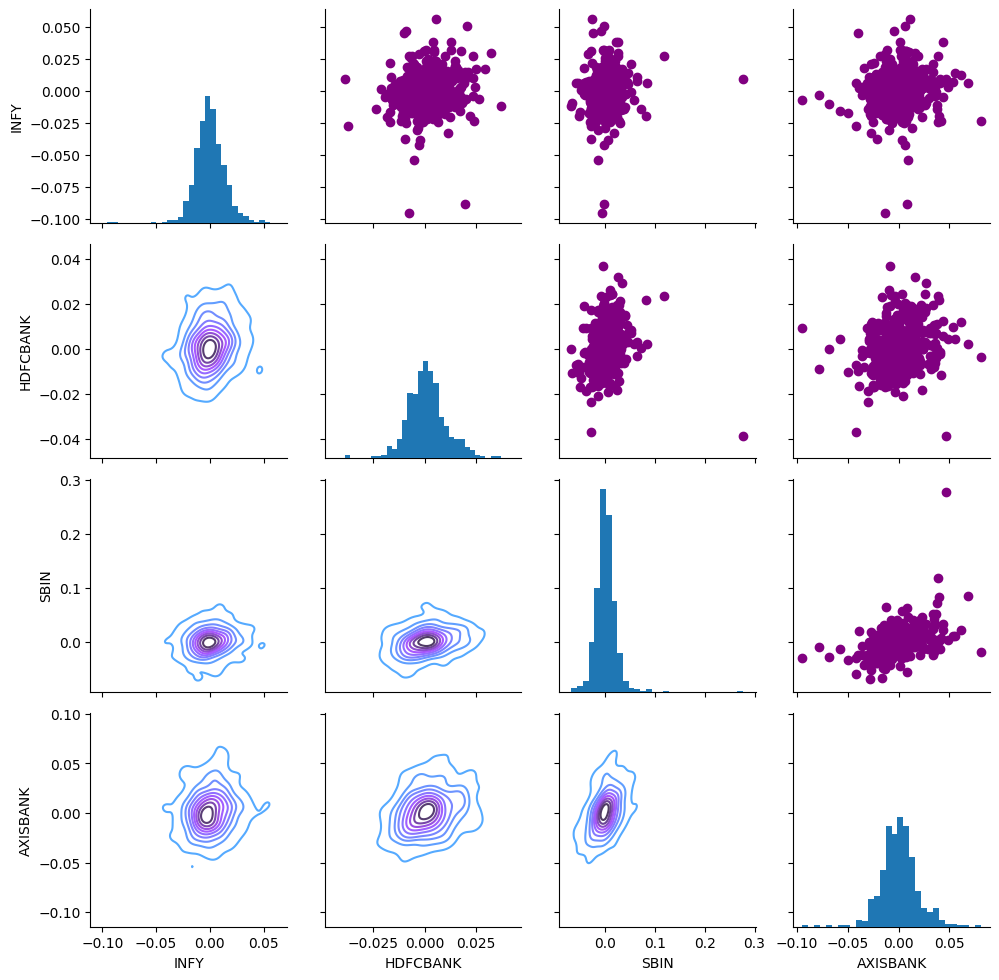

In [32]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

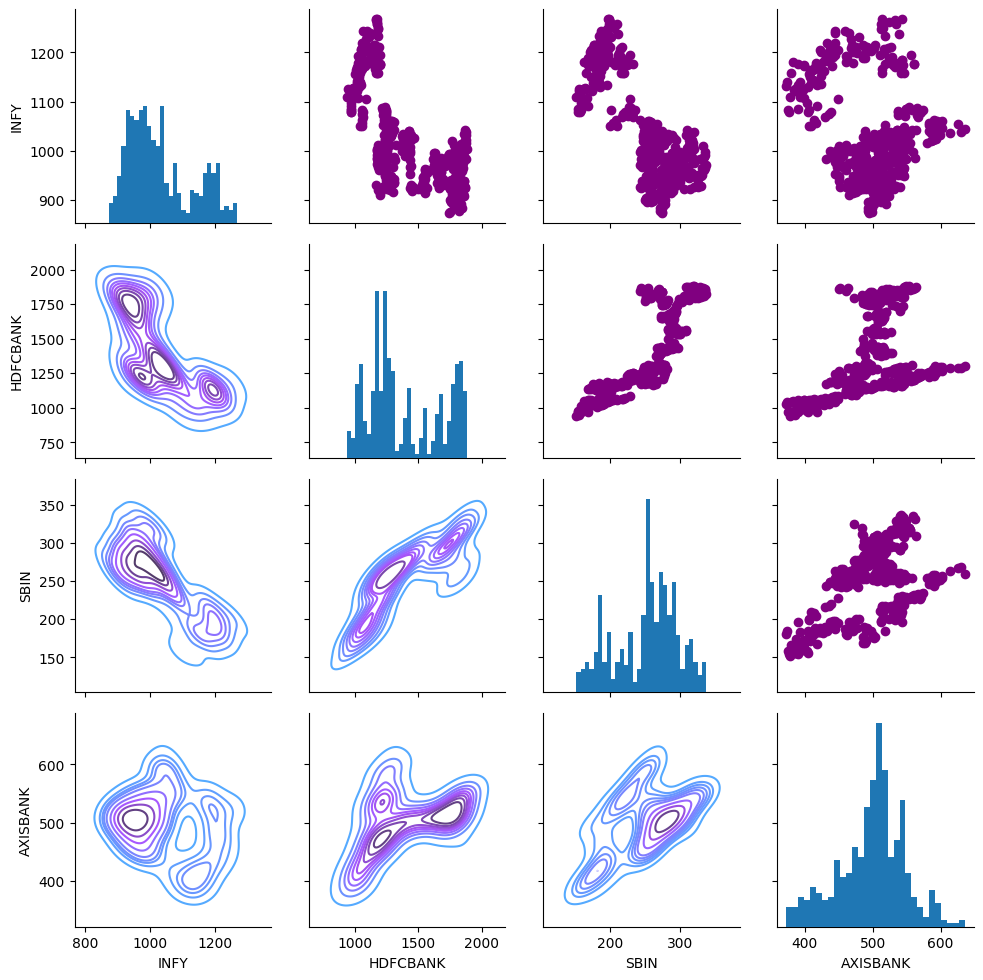

In [33]:
returns_fig = sns.PairGrid(closing_prices)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

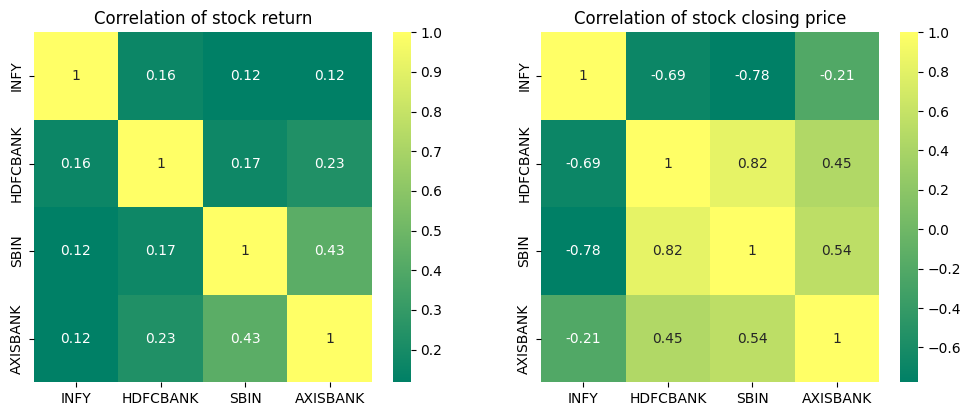

In [34]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_prices.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

**Stock Prediction of Top 4 Company**

In [35]:
INFY = INFY[['OPEN','CLOSE','HIGH','LOW']]
HDFCBANK = HDFCBANK[['OPEN','CLOSE','HIGH','LOW']]
AXISBANK = AXISBANK[['OPEN','CLOSE','HIGH','LOW']]
SBIN = SBIN[['OPEN','CLOSE','HIGH','LOW']]

In [36]:
company_list =[INFY, HDFCBANK,AXISBANK,SBIN]
company_name  =['INFY','SBIN','AXISBANK','HDFCBANK']

**Info()**

In [37]:
for name, company in zip(company_name, company_list):
    print(f'{name}.info():')
    company.info()
    print()

INFY.info():
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 495 entries, 2016-01-01 to 2017-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OPEN    495 non-null    float64
 1   CLOSE   495 non-null    float64
 2   HIGH    495 non-null    float64
 3   LOW     495 non-null    float64
dtypes: float64(4)
memory usage: 19.3 KB

SBIN.info():
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 495 entries, 2016-01-01 to 2017-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OPEN    495 non-null    float64
 1   CLOSE   495 non-null    float64
 2   HIGH    495 non-null    float64
 3   LOW     495 non-null    float64
dtypes: float64(4)
memory usage: 19.3 KB

AXISBANK.info():
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 495 entries, 2016-01-01 to 2017-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  ----------

**Describe()**

In [38]:

for name, company in zip(company_name, company_list):
    print(f'{name}.Describe:',
    company.describe())
    print()

INFY.Describe:               OPEN        CLOSE         HIGH          LOW
count   495.000000   495.000000   495.000000   495.000000
mean   1032.456465  1031.485758  1042.283737  1021.293333
std      97.914264    98.051291    99.272783    96.946076
min     880.000000   873.400000   887.600000   860.000000
25%     954.825000   955.200000   964.175000   947.225000
50%    1006.100000  1005.300000  1017.900000   996.250000
75%    1087.800000  1085.075000  1101.325000  1075.100000
max    1267.000000  1267.600000  1279.300000  1261.100000

SBIN.Describe:               OPEN        CLOSE         HIGH          LOW
count   495.000000   495.000000   495.000000   495.000000
mean   1392.372727  1392.988081  1402.327172  1382.316364
std     282.501624   282.981504   283.903854   281.579681
min     950.000000   942.650000   957.250000   928.000000
25%    1176.500000  1175.425000  1185.000000  1169.175000
50%    1285.000000  1285.100000  1292.950000  1276.400000
75%    1676.275000  1677.675000  1687.750

In [39]:
HDFCBANK

,OPEN,CLOSE,HIGH,LOW
Date,,,,
2016-01-01,1082.40,1088.75,1090.25,1076.15
2016-01-04,1084.00,1070.50,1084.00,1068.10
2016-01-05,1070.20,1062.40,1074.80,1061.35
2016-01-06,1056.65,1067.10,1076.75,1056.65
2016-01-07,1060.10,1056.20,1064.90,1049.70
...,...,...,...,...
2017-12-22,1879.00,1876.65,1880.00,1861.75
2017-12-26,1881.00,1868.35,1882.80,1856.70
2017-12-27,1870.10,1856.75,1870.30,1851.15


**Remove Mising Values**

In [40]:
INFY.dropna(inplace=True)
HDFCBANK.dropna(inplace=True)
AXISBANK.dropna(inplace=True)
SBIN.dropna(inplace=True)



**Training Model In Loop For 4 Company**

Training model for INFY...
Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1356 - val_loss: 0.0155
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0137 - val_loss: 0.0059
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0112 - val_loss: 0.0062
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0088 - val_loss: 0.0049
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0075 - val_loss: 0.0048
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0079 - val_loss: 0.0046
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0072 - val_loss: 0.0046
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0076 - val_loss: 0.0045
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0078 - val_loss: 0.0043
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0083 - val_loss: 0.0041
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064 - val_loss: 0.0043
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 

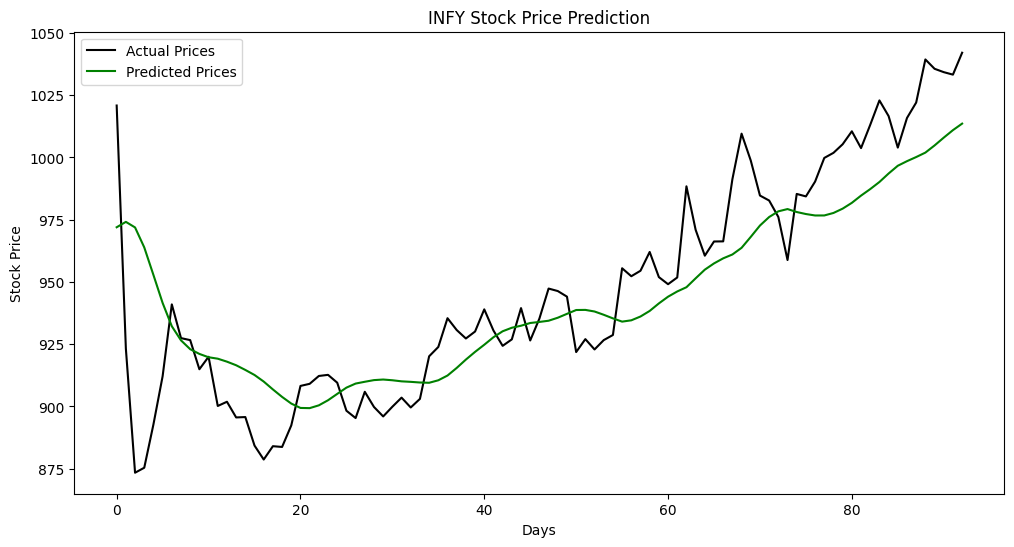

Training model for SBIN...
Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0972 - val_loss: 0.0159
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0101 - val_loss: 0.0213
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0073 - val_loss: 0.0017
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0045 - val_loss: 9.5432e-04
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 - val_loss: 9.9671e-04
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0034 - val_loss: 0.0010
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0036 - val_loss: 9.9485e-04
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0029 - val_loss: 9.8648e-04
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 12/20
12/12 ━━━

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


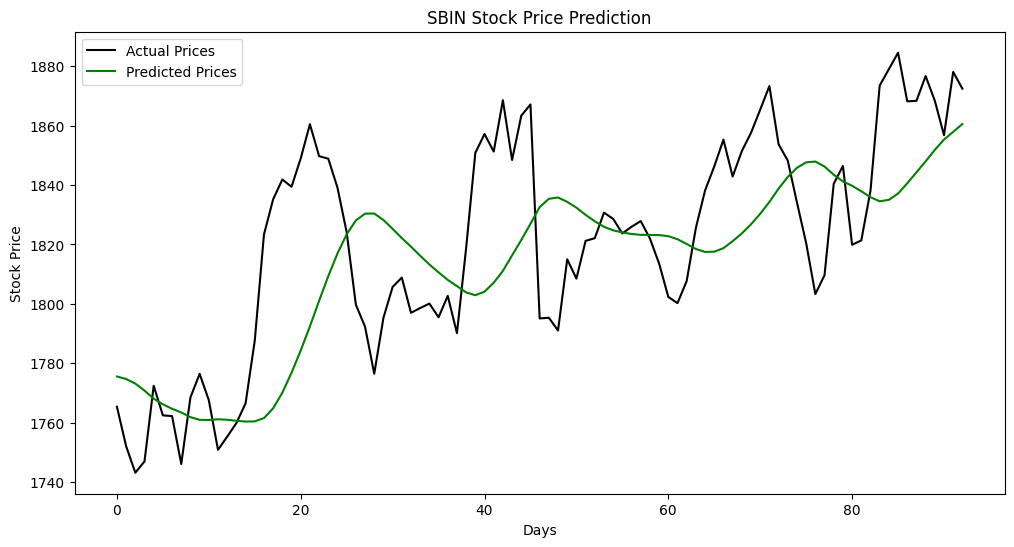

Training model for AXISBANK...
Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1177 - val_loss: 0.0060
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0118 - val_loss: 0.0075
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0092 - val_loss: 0.0053
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0086 - val_loss: 0.0051
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0064 - val_loss: 0.0064
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0071 - val_loss: 0.0050
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0075 - val_loss: 0.0054
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0067 - val_loss: 0.0051
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0070 - val_loss: 0.0049
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066 - val_loss: 0.0053
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0060 - val_loss: 0.0050
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━

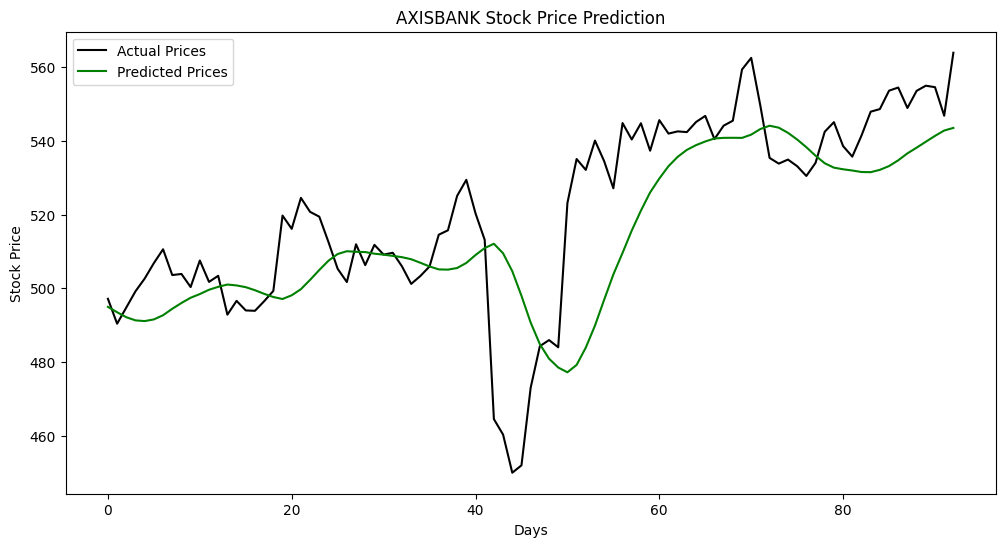

Training model for HDFCBANK...
Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2332 - val_loss: 0.0478
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0202 - val_loss: 0.0423
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0123 - val_loss: 0.0116
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0074 - val_loss: 0.0178
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0067 - val_loss: 0.0115
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0059 - val_loss: 0.0120
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0045 - val_loss: 0.0115
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0047 - val_loss: 0.0109
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0051 - val_loss: 0.0108
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054 - val_loss: 0.0118
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - val_loss: 0.0119
Epoch 12/20
12/12 ━━━━━━━━━━━━━━

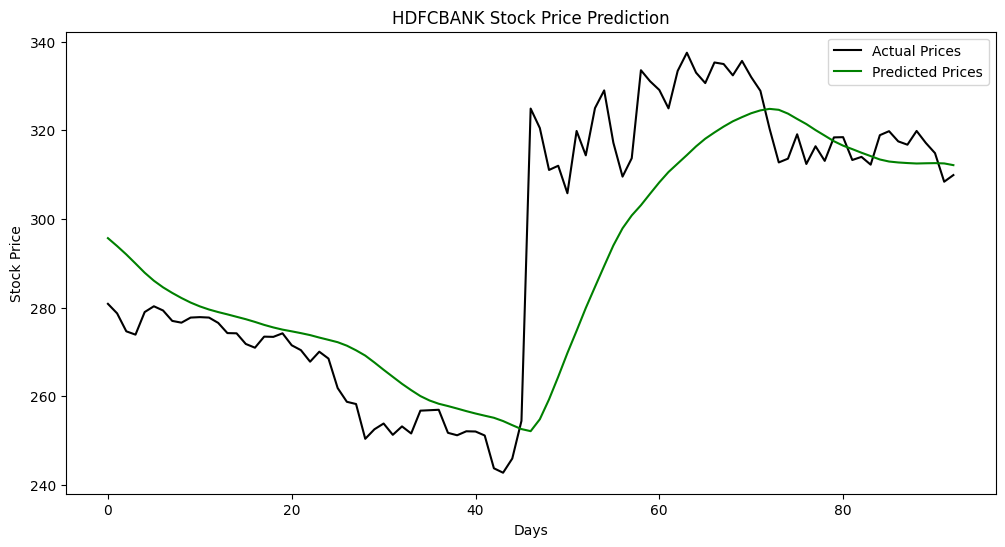

In [42]:
# Creating X_train and y_train Data Structures.


sequence_length = 30

for i, data in enumerate(company_list):
    close_prices = data['CLOSE'].values

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(close_prices.reshape(-1, 1))


    X, y = [], []
    for j in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[j-sequence_length:j, 0])
        y.append(scaled_data[j, 0])

    X, y = np.array(X), np.array(y)

    X = X.reshape((X.shape[0], X.shape[1], 1))

    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Model Architecture

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    print(f"Training model for {company_name[i]}...")
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)  # Scale back to original values

    actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
    plt.figure(figsize=(12, 6))
    plt.plot(actual_prices, color='black', label='Actual Prices')
    plt.plot(predictions, color='green', label='Predicted Prices')
    plt.title(f'{company_name[i]} Stock Price Prediction')
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()


**Conclution :**


The LSTM model effectively predicted stock prices by learning from historical data, with predictions closely following the actual price trends. While the model captures the overall stock price movement, further improvements can be made by refining the model and incorporating additional features or data.